In [1]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

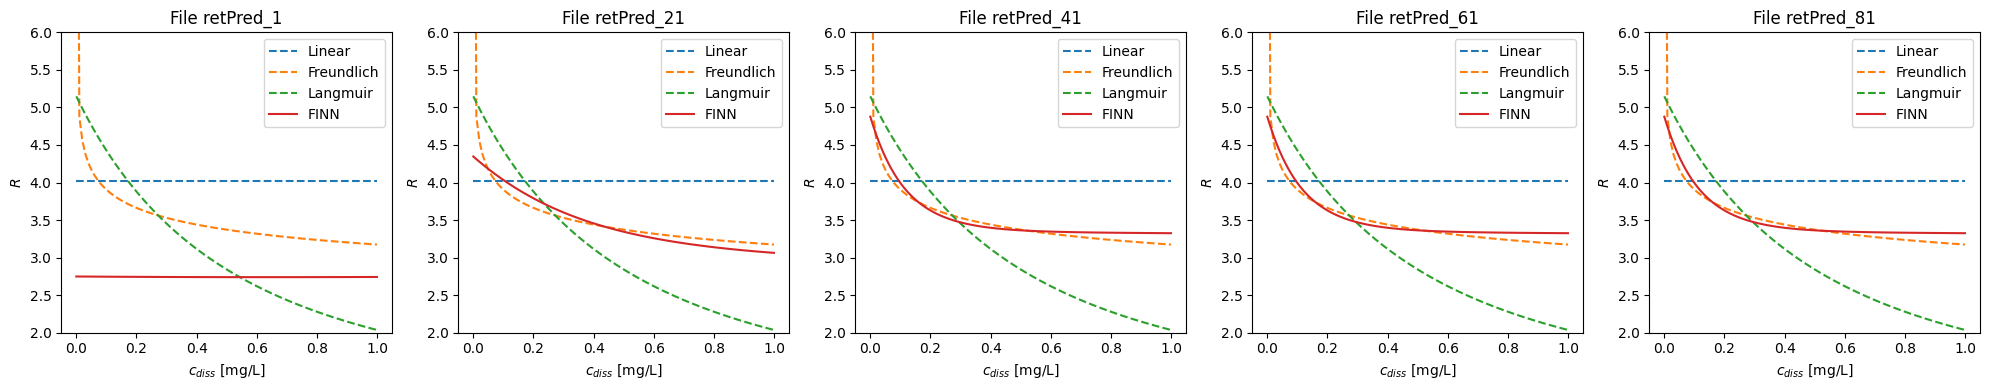

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


def plot_retardation():
    base_dir = Path("../data_out").resolve()

    # Load retardation data for different models
    u = np.load(base_dir / "u_ret.npy")
    retardation_linear = np.load(base_dir / "retardation_linear.npy")
    retardation_freundlich = np.load(base_dir / "retardation_freundlich.npy")
    retardation_langmuir = np.load(base_dir / "retardation_langmuir.npy")

    fig, ax = plt.subplots()
    ax.set_ylim([2, 6])
    plt.plot(u, retardation_linear, linestyle="--", label="Linear")
    plt.plot(u, retardation_freundlich, linestyle="--", label="Freundlich")
    plt.plot(u, retardation_langmuir, linestyle="--", label="Langmuir")

    (ret_pred,) = ax.plot(u, np.zeros_like(u), label="FINN")

    plt.title("Predicted Retardation Factor", fontsize=16)
    plt.xlabel(r"$c_{diss}$ [mg/L]", fontsize=16)
    plt.ylabel(r"$R$", fontsize=16)
    plt.legend(fontsize=16)
    plt.tight_layout()

    pred_ret_path = base_dir / "predicted_retardations"

    def update(file_path):
        ret_pred_data = np.load(file_path)
        ret_pred.set_ydata(ret_pred_data)
        ax.set_ylim([2, 6])
        ax.set_title(f"Predicted Retardation Factor ({file_path.stem})")

    all_files = sorted(
        (p.absolute() for p in pred_ret_path.glob("retPred_*.npy")),
        key=lambda p: int(p.stem.split("_")[-1]),
    )
    files = all_files[:: max(1, len(all_files) // 5)]

    ani = animation.FuncAnimation(fig, update, frames=all_files[::3], interval=200)

    # Save the animation as gif
    ani.save("../retardation_animation.gif", writer="imagemagick")

    # Display the animation in the notebook
    plt.close(fig)
    display(HTML(ani.to_jshtml()))

    # Display static images for the 5 epochs
    fig, axes = plt.subplots(1, len(files), figsize=(4 * len(files), 4))
    for ax, file in zip(axes, files):
        ret_pred_data = np.load(file)
        ax.plot(u, retardation_linear, linestyle="--", label="Linear")
        ax.plot(u, retardation_freundlich, linestyle="--", label="Freundlich")
        ax.plot(u, retardation_langmuir, linestyle="--", label="Langmuir")
        ax.plot(u, ret_pred_data, label="FINN")
        ax.set_title(f"File {file.stem}")
        ax.set_xlabel(r"$c_{diss}$ [mg/L]")
        ax.set_ylabel(r"$R$")
        ax.set_ylim([2, 6])
        ax.legend()

    plt.tight_layout()
    plt.show()


# def plot_full_field():
#     plt.figure(figsize=(10.0, 5.0))
#     plt.subplot(121)
#     plt.pcolormesh(self.x, self.t, data)
#     if diss:
#         caption = "Dissolved"
#         save_name = "diss"
#     else:
#         caption = "Total"
#         save_name = "tot"
#     plt.title(caption + " Concentration Data", fontsize=16)
#     plt.xlabel("Depth [m]", fontsize=16)
#     plt.ylabel("time [days]", fontsize=16)
#     plt.colorbar()
#     plt.clim([0, torch.max(data)])

#     plt.subplot(122)
#     plt.pcolormesh(self.x, self.t, pred.cpu().detach())
#     plt.title(caption + " Concentration Prediction", fontsize=16)
#     plt.xlabel("Depth [m]", fontsize=16)
#     plt.ylabel("time [days]", fontsize=16)
#     plt.colorbar()
#     plt.clim([0, torch.max(data)])
#     plt.tight_layout()
#     plt.savefig(cfg.model_path / f"{cfg.model_name}_c_{save_name}.png")

plot_retardation()

/Users/r/Documents/stud/ss24/finnpinn/data_out


FileNotFoundError: [Errno 2] No such file or directory: '/Users/r/Documents/stud/ss24/finnpinn/data_out/finn_pos/predicted_retardations/retPred_100.npy'

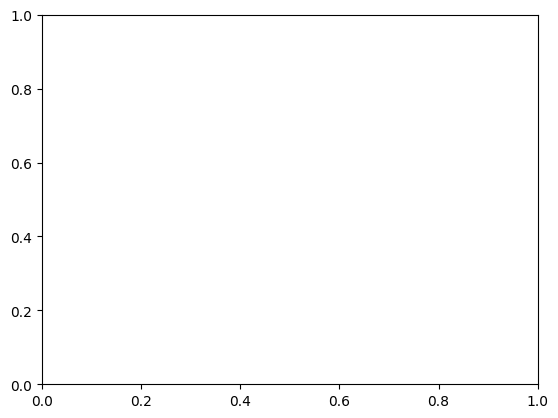

In [3]:
fig, ax = plt.subplots()

base_path = Path("../data_out/").resolve()
print(base_path)
ret_mean = np.load(base_path / "predicted_retardations/retPred_100.npy")
ret_pos = np.load(base_path / "finn_pos/predicted_retardations/retPred_100.npy")
ret_neg = np.load(base_path / "finn_neg/predicted_retardations/retPred_100.npy")
ax.plot(ret_mean, "k--")
ax.plot(ret_pos, "b")
ax.plot(ret_neg, "r")
plt.show()

In [ ]:
fig, ax = plt.subplots()

base_path = Path("../data_out/").resolve()
print(base_path)
ret_mean = np.load(base_path / "predicted_retardations/retPred_100.npy")
ret_pos = np.load(base_path / "finn_pos/predicted_retardations/retPred_100.npy")
ret_neg = np.load(base_path / "finn_neg/predicted_retardations/retPred_100.npy")
ax.plot(ret_mean, "k--")
ax.plot(ret_pos+0.1, "b")
ax.plot(ret_neg-0.1, "r")
plt.show()